In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
df = pd.read_csv('D:\\fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.shape

(159, 7)

In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [7]:
temp

,data_type,null_count,unique_count
Species,object,0,7
Weight,float64,0,101
Length1,float64,0,116
Length2,float64,0,93
Length3,float64,0,124
Height,float64,0,154
Width,float64,0,152


In [8]:
df = df.drop_duplicates()
df.shape

(159, 7)

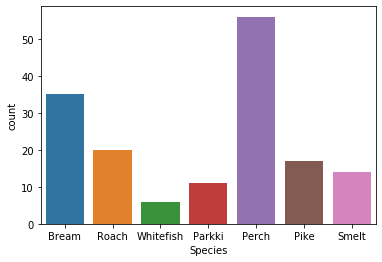

In [9]:
sns.countplot(x='Species',data=df)

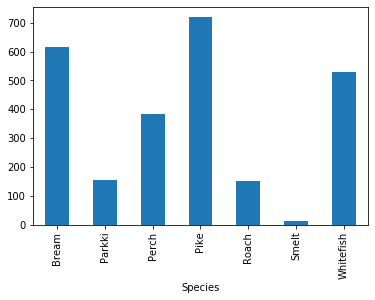

In [10]:
df.groupby('Species')['Weight'].mean().plot.bar()

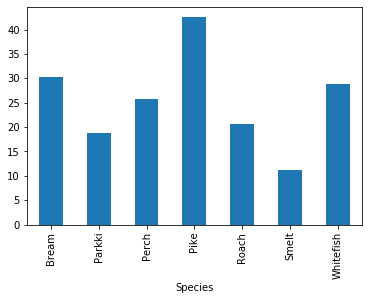

In [11]:
df.groupby('Species')['Length1'].mean().plot.bar()

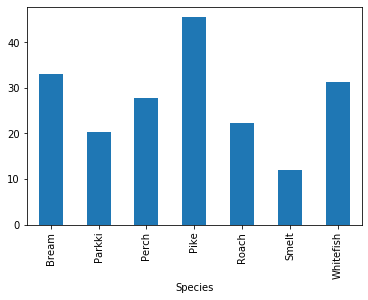

In [12]:
df.groupby('Species')['Length2'].mean().plot.bar()

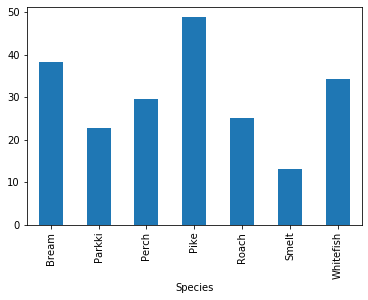

In [13]:
df.groupby('Species')['Length3'].mean().plot.bar()

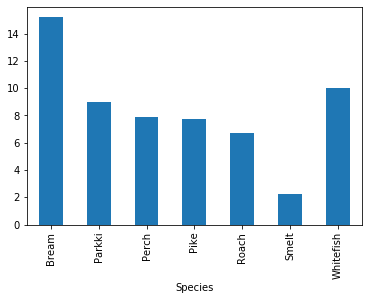

In [14]:
df.groupby('Species')['Height'].mean().plot.bar()

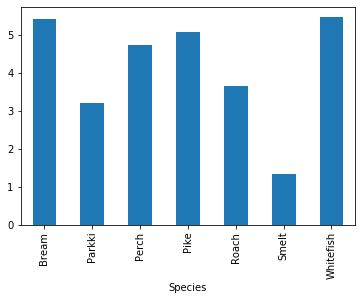

In [15]:
df.groupby('Species')['Width'].mean().plot.bar()

In [16]:
col = list( df.columns )
col

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [26]:
X = df[col[1:]]
X[0:5]

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [38]:
Y = (df[col[0]])
Y[0:5]

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [39]:
Y = pd.get_dummies( Y )

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
X = StandardScaler().fit_transform(X)
X[0:5]

array([[-0.43807217, -0.30578858, -0.28230301, -0.10602023,  0.59657867,
        -0.23652895],
       [-0.30356218, -0.22550724, -0.19805366, -0.00233668,  0.82126055,
        -0.06657895],
       [-0.16344761, -0.23554241, -0.17933159, -0.01097698,  0.79734129,
         0.16579317],
       [-0.09899491,  0.0053016 ,  0.05469437,  0.19639012,  0.87977146,
         0.022621  ],
       [ 0.08875862,  0.02537193,  0.05469437,  0.23959159,  0.81283498,
         0.42637127]])

In [50]:
from sklearn.model_selection import train_test_split

In [58]:
x_train , x_test , y_train , y_test = train_test_split( X ,Y , test_size = 0.2, random_state = 10)

In [80]:
def classification_model():
    model = Sequential()
    model.add(Dense(50,activation='relu',input_shape=(x_test.shape[1],)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(200,activation='relu'))
    model.add(Dense(y_test.shape[1],activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [81]:
model = classification_model()

In [82]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,verbose=2)

Train on 127 samples, validate on 32 samples
Epoch 1/200
 - 0s - loss: 1.9200 - accuracy: 0.2677 - val_loss: 1.8675 - val_accuracy: 0.4688
Epoch 2/200
 - 0s - loss: 1.7516 - accuracy: 0.5512 - val_loss: 1.7973 - val_accuracy: 0.3438
Epoch 3/200
 - 0s - loss: 1.6129 - accuracy: 0.3780 - val_loss: 1.7297 - val_accuracy: 0.2812
Epoch 4/200
 - 0s - loss: 1.4763 - accuracy: 0.4646 - val_loss: 1.6446 - val_accuracy: 0.4688
Epoch 5/200
 - 0s - loss: 1.3341 - accuracy: 0.6299 - val_loss: 1.5588 - val_accuracy: 0.5000
Epoch 6/200
 - 0s - loss: 1.2022 - accuracy: 0.6929 - val_loss: 1.4547 - val_accuracy: 0.5000
Epoch 7/200
 - 0s - loss: 1.0900 - accuracy: 0.7244 - val_loss: 1.3450 - val_accuracy: 0.5938
Epoch 8/200
 - 0s - loss: 0.9772 - accuracy: 0.7402 - val_loss: 1.2719 - val_accuracy: 0.5312
Epoch 9/200
 - 0s - loss: 0.8841 - accuracy: 0.7717 - val_loss: 1.1856 - val_accuracy: 0.5938
Epoch 10/200
 - 0s - loss: 0.8053 - accuracy: 0.7638 - val_loss: 1.1028 - val_accuracy: 0.5938
Epoch 11/200
 

In [83]:
scores = model.evaluate(x_test,y_test,verbose=0)

In [85]:
print('Accuracy:{}% \n Error:{}'.format(scores[1]*100,1-scores[1]))

Accuracy:87.5% 
 Error:0.125
